In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [2]:
# Load dataset
df = pd.read_csv('transfusion.data')

In [3]:
# Rename target column
df.rename(columns={'whether he/she donated blood in March 2007': 'target'}, inplace=True)


In [4]:
# Basic info and target distribution
print(df.info())
print(df['target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None
target
0    570
1    178
Name: count, dtype: int64


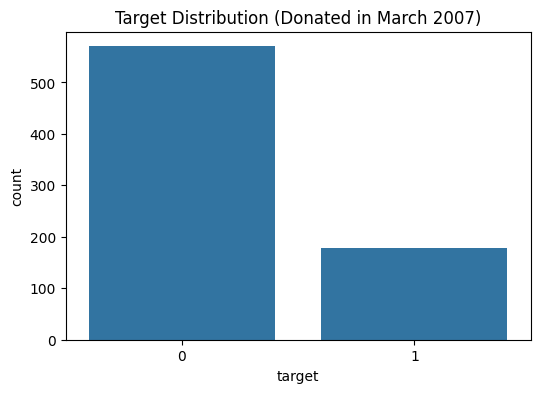

In [5]:
# EDA Visualizations
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Target Distribution (Donated in March 2007)')
plt.show()


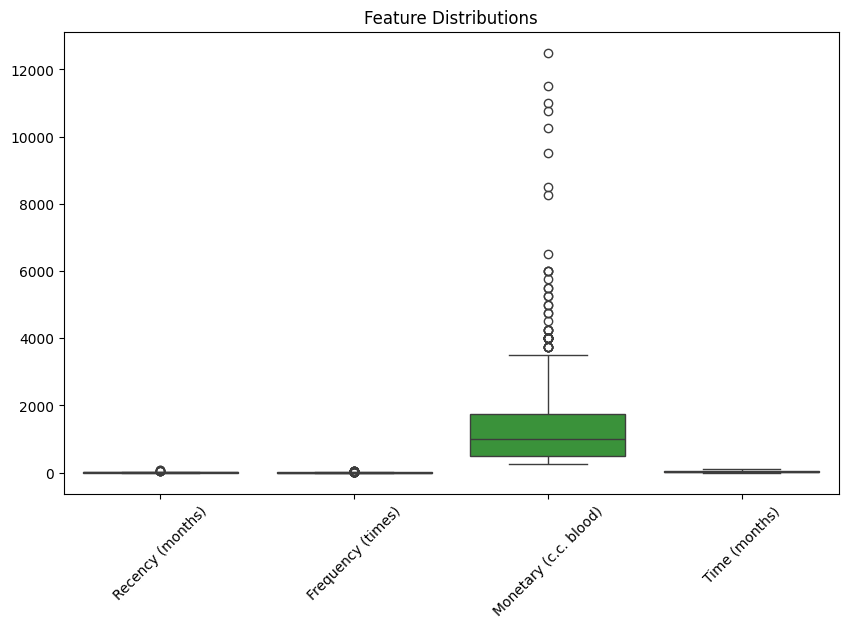

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.drop(columns=['target']))
plt.title('Feature Distributions')
plt.xticks(rotation=45)
plt.show()

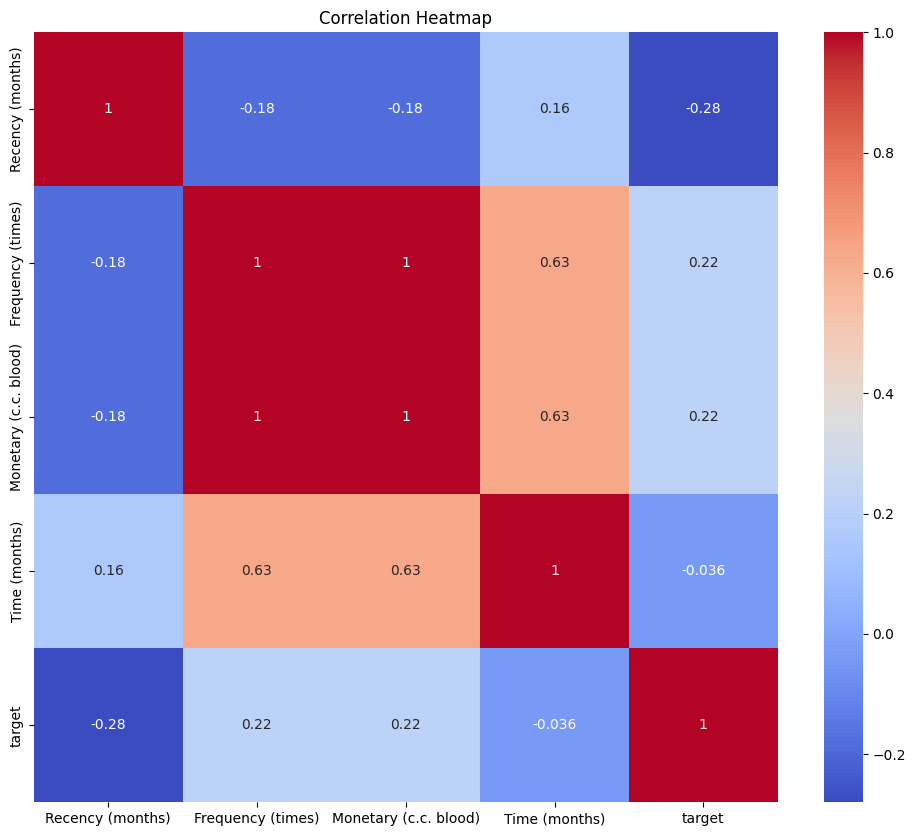

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Define features and target
X = df.drop(columns=['target'])
y = df['target']


In [9]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [11]:
# Train Gradient Boosting Classifier (baseline)
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [12]:
y_pred = gbc.predict(X_test)
acc_no_tune = accuracy_score(y_test, y_pred)
print('Accuracy without hyperparameter tuning:', acc_no_tune)
print('Classification Report without tuning:\n', classification_report(y_test, y_pred))
print('Confusion Matrix without tuning:\n', confusion_matrix(y_test, y_pred))


Accuracy without hyperparameter tuning: 0.7466666666666667
Classification Report without tuning:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       165
           1       0.55      0.27      0.36        60

    accuracy                           0.75       225
   macro avg       0.66      0.59      0.60       225
weighted avg       0.72      0.75      0.71       225

Confusion Matrix without tuning:
 [[152  13]
 [ 44  16]]


In [13]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 1.0]
}

In [14]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 4, ...], 'n_estimators': [50, 100, ...], 'subsample': [0.7, 1.0]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [15]:
best_gbc = grid_search.best_estimator_
print('Best parameters:', grid_search.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}


Accuracy with hyperparameter tuning: 0.7466666666666667
Classification Report with tuning:
               precision    recall  f1-score   support

           0       0.75      0.97      0.85       165
           1       0.62      0.13      0.22        60

    accuracy                           0.75       225
   macro avg       0.69      0.55      0.53       225
weighted avg       0.72      0.75      0.68       225



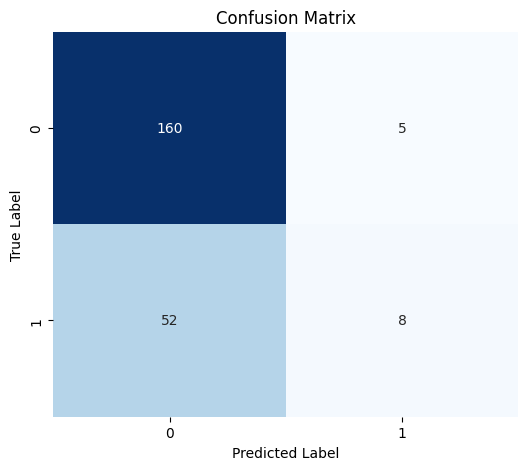

In [19]:
y_pred_tuned = best_gbc.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
print('Accuracy with hyperparameter tuning:', acc_tuned)
print('Classification Report with tuning:\n', classification_report(y_test, y_pred_tuned))
cm=confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


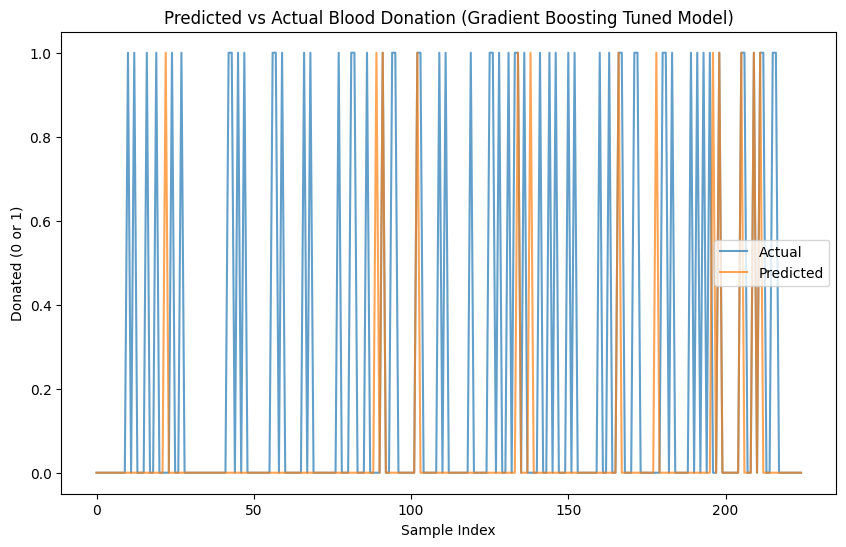

In [17]:
# Visualization of prediction vs actual for tuned model
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test.reset_index(drop=True), label='Actual', alpha=0.7)
plt.plot(range(len(y_pred_tuned)), y_pred_tuned, label='Predicted', alpha=0.7)
plt.title('Predicted vs Actual Blood Donation (Gradient Boosting Tuned Model)')
plt.xlabel('Sample Index')
plt.ylabel('Donated (0 or 1)')
plt.legend()
plt.show()

In [18]:
# Export model
joblib.dump(best_gbc, '23MID0219gbc_blood_donation_tuned_model.pkl')
print('Tuned Gradient Boosting model exported as gbc_blood_donation_tuned_model.pkl')

Tuned Gradient Boosting model exported as gbc_blood_donation_tuned_model.pkl
